In [1]:
import numpy as np
import pandas as pd

# 1. Regression

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [3]:
# загружаем данные
phones = pd.read_csv("1.8_phones.csv")

In [34]:
phones.head(7)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015


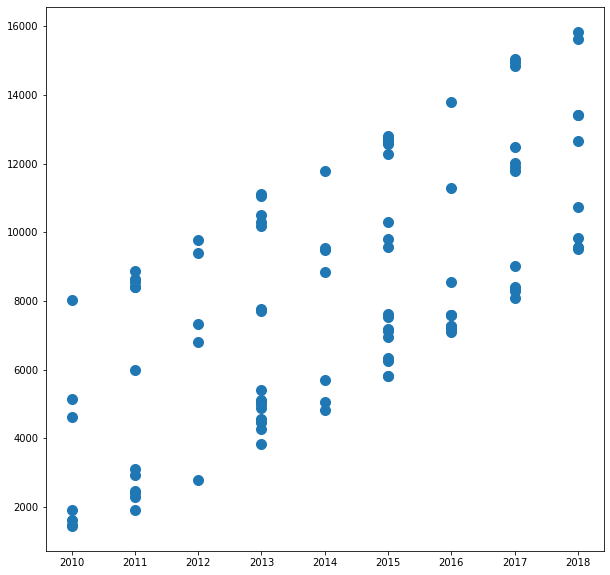

In [7]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)

# отображаем картинку
plt.show()

In [8]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [9]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[["year"]]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [10]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(year):
    return a + b * year

In [12]:
reg_prediction(X.year[0])

9838.83475733595

In [13]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

9838.83475733595

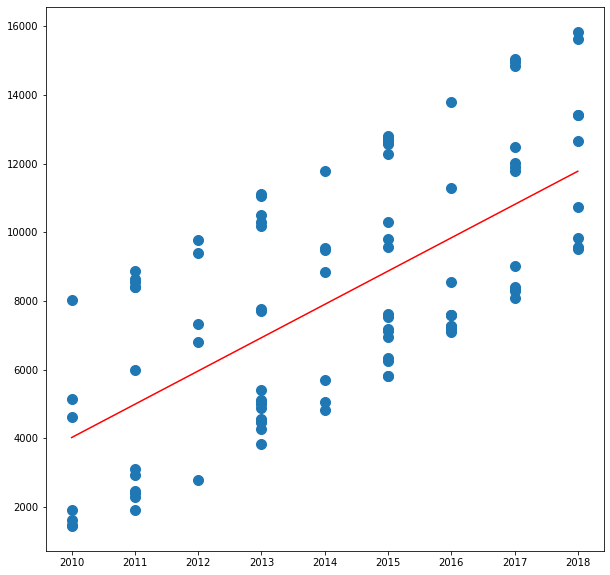

In [15]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")

# отображаем картинку
plt.show()

# 2. Classification

In [16]:
# импортируем модуль, отвечающий за деревья решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [17]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[["disk", "price"]]
y = phones["year"]

# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [18]:
# выведем информацию для интерпретации построенной модели
print(export_text(cl))

|--- feature_1 <= 5555.00
|   |--- feature_1 <= 3469.00
|   |   |--- feature_1 <= 1744.50
|   |   |   |--- class: 2010
|   |   |--- feature_1 >  1744.50
|   |   |   |--- feature_1 <= 2096.50
|   |   |   |   |--- feature_1 <= 1903.00
|   |   |   |   |   |--- class: 2011
|   |   |   |   |--- feature_1 >  1903.00
|   |   |   |   |   |--- class: 2010
|   |   |   |--- feature_1 >  2096.50
|   |   |   |   |--- feature_0 <= 24.00
|   |   |   |   |   |--- class: 2012
|   |   |   |   |--- feature_0 >  24.00
|   |   |   |   |   |--- class: 2011
|   |--- feature_1 >  3469.00
|   |   |--- feature_0 <= 192.00
|   |   |   |--- feature_0 <= 48.00
|   |   |   |   |--- feature_1 <= 4655.00
|   |   |   |   |   |--- class: 2013
|   |   |   |   |--- feature_1 >  4655.00
|   |   |   |   |   |--- class: 2014
|   |   |   |--- feature_0 >  48.00
|   |   |   |   |--- class: 2013
|   |   |--- feature_0 >  192.00
|   |   |   |--- class: 2010
|--- feature_1 >  5555.00
|   |--- feature_1 <= 7660.50
|   |   |--- fe

In [20]:
# проведем классификацию
cl.predict(X[5:8])[0], y[7]

(2018, 2013)

# 3. Clustering

In [29]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=5) # для увеличения шрифта подписей графиков

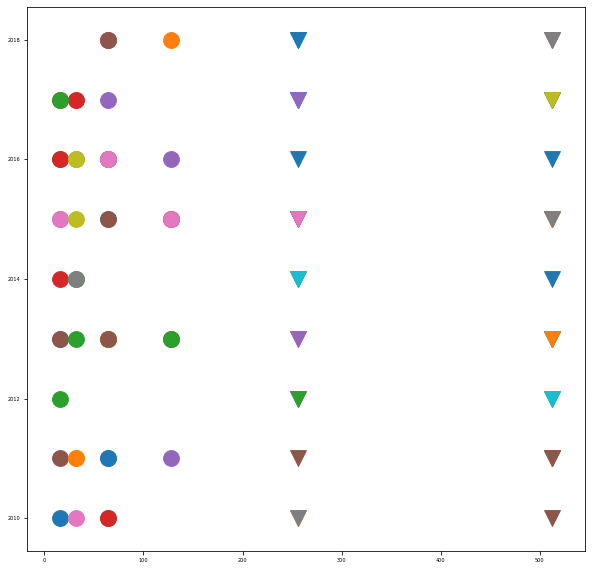

In [33]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [35]:
# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

In [44]:
# выгружаем признаки в отдельную переменную
X = phones[["disk", "year"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

In [45]:
# смотрим центры кластеров
[c1, c2, c3] = clust.cluster_centers_

In [46]:
clust.cluster_centers_

array([[ 256.        , 2014.57142857],
       [  57.35849057, 2014.24528302],
       [ 512.        , 2013.88461538]])

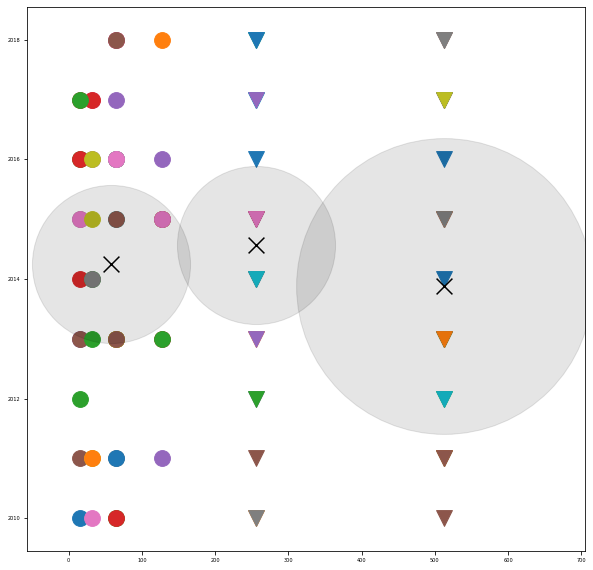

In [47]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.year, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
    # добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()